# INDOOR PLANT CLASSIFICATION USING DEEP LEARNING TECHNIQUES

Prepared by

Shrabon Datta

Students ID:	221-15-5445

Daffodil International University

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
from IPython.display import Image, display, Markdown
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.initializers import glorot_uniform
from keras.preprocessing.image import ImageDataGenerator
from time import perf_counter
import glob
import matplotlib.cm as cm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns

In [ ]:
image_dir = Path('/content/drive/MyDrive/indoor plant classification/indoor_plant_data_set/indoor_plant_data_set')
filepaths = list(image_dir.glob(r'**/*/*'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [ ]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(5)

Visualization

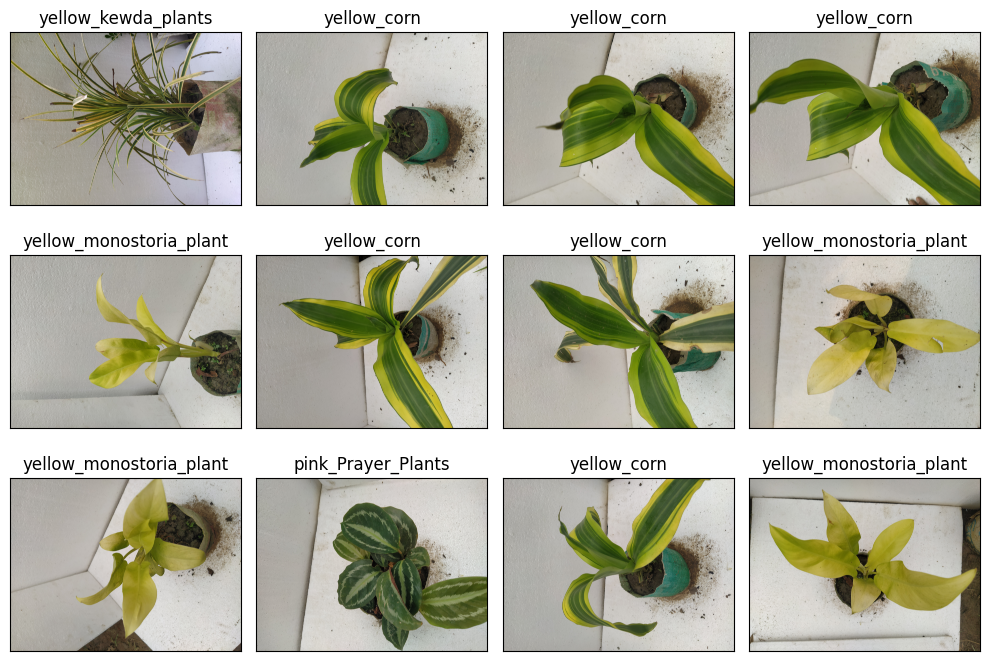

In [ ]:
# Display some pictures of the dataset with their labels
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

In [ ]:
vc = image_df['Label'].value_counts()
print(vc)

Label
yellow_corn                375
yellow_kewda_plants        264
pink_Prayer_Plants         257
yellow_monostoria_plant    243
butterfly_lily_plants      215
Name: count, dtype: int64


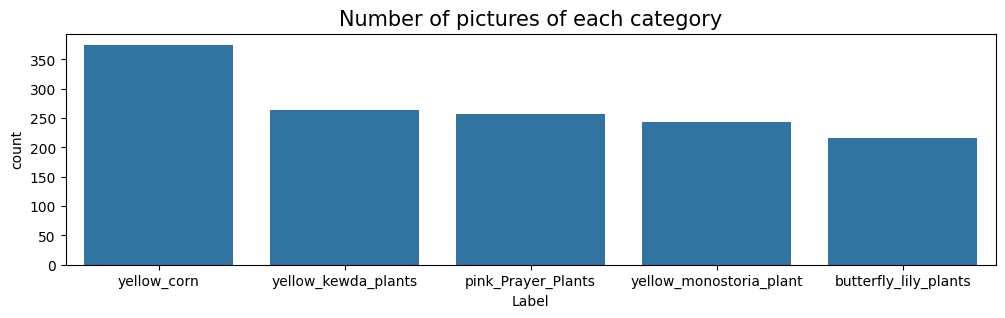

In [ ]:
# Display the number of pictures of each category
vc = image_df['Label'].value_counts()
plt.figure(figsize=(12,3))
sns.barplot(x = vc.index, y = vc)
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [ ]:
def create_gen():
    # Load the Images with a generator and Data Augmentation
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.1
    )

    test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    train_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
    )

    val_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
    )

    test_images = test_generator.flow_from_dataframe(
        dataframe=test_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )

    return train_generator,test_generator,train_images,val_images,test_images

In [ ]:
# Separate in train and test data
train_df, test_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [ ]:
# Create the generators
train_generator,test_generator,train_images,val_images,test_images=create_gen()


Found 1083 validated image filenames belonging to 5 classes.
Found 1083 validated image filenames belonging to 5 classes.
Found 271 validated image filenames belonging to 5 classes.


## CNN Model

In [ ]:
input_shape = (32, 224, 224, 3)
n_classes = 5

model_01 = models.Sequential([
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu'),
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128,  kernel_size = (3,3), activation='relu'),
    layers.Conv2D(128,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Dropout(0.25),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model_01.build(input_shape=input_shape)
model_01.summary()

model_01.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (32, 222, 222, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (32, 220, 220, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (32, 110, 110, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (32, 108, 108, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (32, 106, 106, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 53, 53, 64)          0         
 g2D)                                                   

In [ ]:
history_01 = model_01.fit(train_images,validation_data=val_images,epochs=20,verbose=1)

Epoch 1/20
34/34 [==============================] - 818s 24s/step - loss: 0.7518 - accuracy: 0.7544 - val_loss: 1.4224 - val_accuracy: 0.2724
Epoch 2/20
34/34 [==============================] - 244s 7s/step - loss: 0.3144 - accuracy: 0.9040 - val_loss: 1.1152 - val_accuracy: 0.3943
Epoch 3/20
34/34 [==============================] - 208s 6s/step - loss: 0.1935 - accuracy: 0.9289 - val_loss: 1.4180 - val_accuracy: 0.4755
Epoch 4/20
34/34 [==============================] - 210s 6s/step - loss: 0.1979 - accuracy: 0.9391 - val_loss: 4.5364 - val_accuracy: 0.4358
Epoch 5/20
34/34 [==============================] - 238s 7s/step - loss: 0.2330 - accuracy: 0.9307 - val_loss: 3.7139 - val_accuracy: 0.6362
Epoch 6/20
34/34 [==============================] - 214s 6s/step - loss: 0.0763 - accuracy: 0.9778 - val_loss: 1.5154 - val_accuracy: 0.6648
Epoch 7/20
34/34 [==============================] - 203s 6s/step - loss: 0.0666 - accuracy: 0.9797 - val_loss: 2.0492 - val_accuracy: 0.6362
Epoch 8/20
3



Train Accuracy and Loss Plot: 



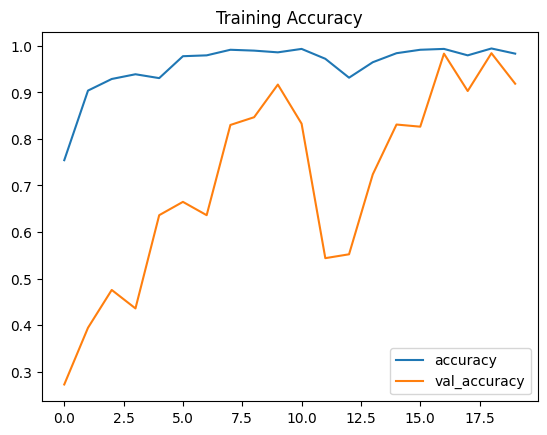

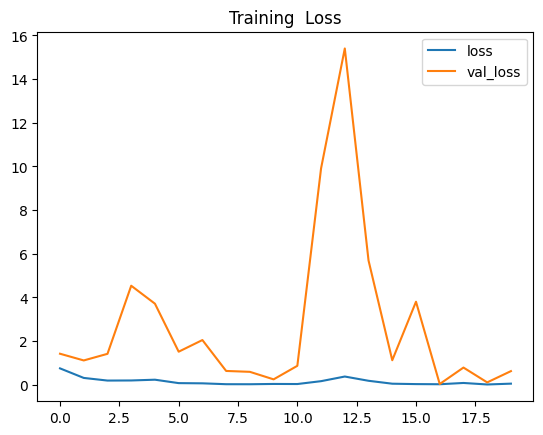



Accuracy on the test set: 91.14%
9/9 [==============================] - 26s 3s/step
Accuracy: 0.91144
Precision: 0.92593
Recall: 0.91144
F1 Score: 0.91217
                         precision    recall  f1-score   support

  butterfly_lily_plants       0.87      0.74      0.80        46
     pink_Prayer_Plants       1.00      0.82      0.90        55
            yellow_corn       0.99      0.97      0.98        80
    yellow_kewda_plants       0.72      1.00      0.83        43
yellow_monostoria_plant       0.98      1.00      0.99        47

               accuracy                           0.91       271
              macro avg       0.91      0.91      0.90       271
           weighted avg       0.93      0.91      0.91       271

Confusion Matrix of CNN: 




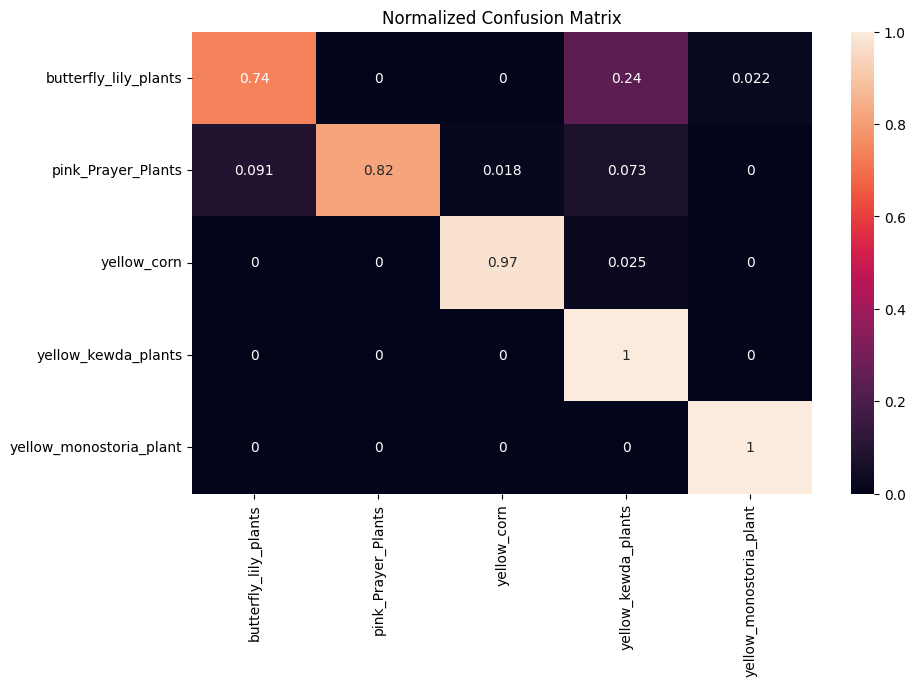

Performance: 

Rec=    90.64624505928855
Spe=    99.96535646318256
Pre=    91.97831448972342
FPR=    0.03464353681744988
FNR=    9.353754940711461
NPV=    99.96537772948656
FDR=    8.021685510276603




In [ ]:
print('\n')


val_acc = history_01.history['val_accuracy']
train_acc = history_01.history['accuracy']

results = model_01.evaluate(test_images, verbose=0)
res=results[1]
test_acc = [round(res,4)]
#ploting training acc loss
print("Train Accuracy and Loss Plot: \n")
pd.DataFrame(history_01.history)[['accuracy','val_accuracy']].plot()
plt.title("Training Accuracy")
plt.show()
pd.DataFrame(history_01.history)[['loss','val_loss']].plot()
plt.title("Training  Loss")
plt.show()
print("\n\nAccuracy on the test set: {:.2f}%".format(results[1] * 100))

from sklearn.metrics import confusion_matrix
import seaborn as sns
pred = model_01.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]
y_test = list(test_df.Label)

print('Accuracy:', np.round(metrics.accuracy_score(y_test, pred),5))
print('Precision:', np.round(metrics.precision_score(y_test, pred, average='weighted'),5))
print('Recall:', np.round(metrics.recall_score(y_test,pred, average='weighted'),5))
print('F1 Score:', np.round(metrics.f1_score(y_test, pred, average='weighted'),5))
print(classification_report(y_test, pred))

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from numpy import mean
print("Confusion Matrix of CNN: \n\n")
cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (10,6))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
plt.title('Normalized Confusion Matrix')
plt.show()
confusion_matrix=cf_matrix
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = len(y_test) - (FP + FN + TP)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
print("Performance: \n")
print("Rec=   ",mean(TPR)*100)
print("Spe=   ",mean(TNR)*100)
print("Pre=   ",mean(PPV)*100)
print("FPR=   ",mean(FPR)*100)
print("FNR=   ",mean(FNR)*100)
print("NPV=   ",mean(NPV)*100)
print("FDR=   ",mean(FDR)*100)
print("\n")

9/9 [==============================] - 26s 3s/step


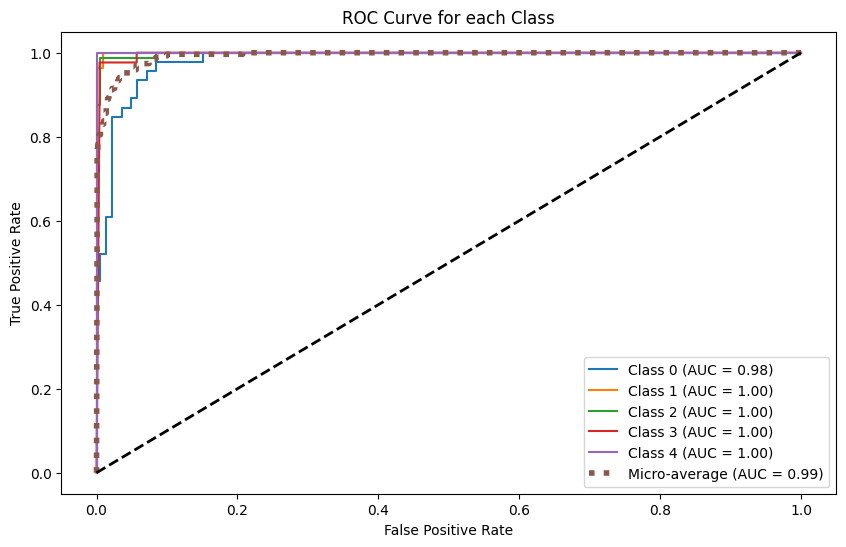

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert labels to binary matrix
y_test_bin = label_binarize(y_test, classes=sorted(set(y_test)))

# Predict probabilities for each class
y_score = model_01.predict(test_images)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})',
         linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each Class')
plt.legend(loc='lower right')
plt.show()


# CNN 2


In [ ]:
input_shape = (32, 224, 224, 3)
n_classes = 5

model_02 = models.Sequential([
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu'),
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model_02.build(input_shape=input_shape)
model_02.summary()

model_02.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (32, 222, 222, 32)        896       
                                                                 
 conv2d_8 (Conv2D)           (32, 220, 220, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (32, 110, 110, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (32, 108, 108, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (32, 54, 54, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (32, 52, 52, 128)        

In [ ]:
history_02 = model_02.fit(train_images,validation_data=val_images,epochs=20,verbose=1)

Epoch 1/20
34/34 [==============================] - 230s 7s/step - loss: 1.4620 - accuracy: 0.4358 - val_loss: 1.9713 - val_accuracy: 0.4949
Epoch 2/20
34/34 [==============================] - 212s 6s/step - loss: 0.6457 - accuracy: 0.7793 - val_loss: 0.3372 - val_accuracy: 0.8717
Epoch 3/20
34/34 [==============================] - 210s 6s/step - loss: 0.2804 - accuracy: 0.8947 - val_loss: 0.1671 - val_accuracy: 0.9391
Epoch 4/20
34/34 [==============================] - 202s 6s/step - loss: 0.1959 - accuracy: 0.9307 - val_loss: 0.1209 - val_accuracy: 0.9594
Epoch 5/20
34/34 [==============================] - 241s 7s/step - loss: 0.0758 - accuracy: 0.9732 - val_loss: 0.0327 - val_accuracy: 0.9917
Epoch 6/20
34/34 [==============================] - 195s 6s/step - loss: 0.0667 - accuracy: 0.9751 - val_loss: 0.0362 - val_accuracy: 0.9843
Epoch 7/20
34/34 [==============================] - 212s 6s/step - loss: 0.0240 - accuracy: 0.9935 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 8/20
34



Train Accuracy and Loss Plot: 



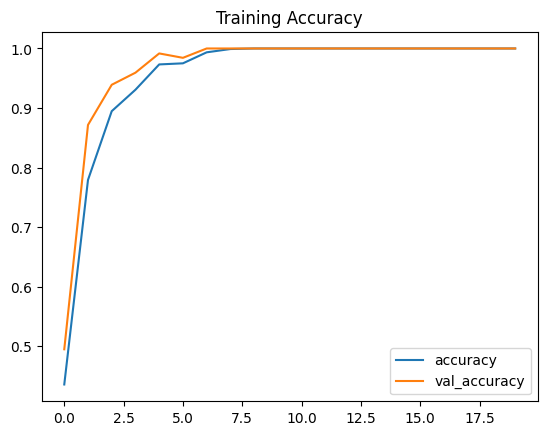

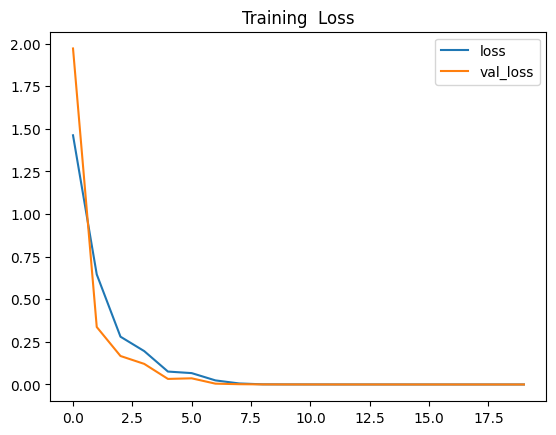



Accuracy on the test set: 98.89%
9/9 [==============================] - 25s 3s/step
Accuracy: 0.98893
Precision: 0.98924
Recall: 0.98893
F1 Score: 0.98898
                         precision    recall  f1-score   support

  butterfly_lily_plants       0.96      1.00      0.98        46
     pink_Prayer_Plants       0.98      0.98      0.98        55
            yellow_corn       1.00      0.99      0.99        80
    yellow_kewda_plants       1.00      0.98      0.99        43
yellow_monostoria_plant       1.00      1.00      1.00        47

               accuracy                           0.99       271
              macro avg       0.99      0.99      0.99       271
           weighted avg       0.99      0.99      0.99       271

Confusion Matrix of CNN: 




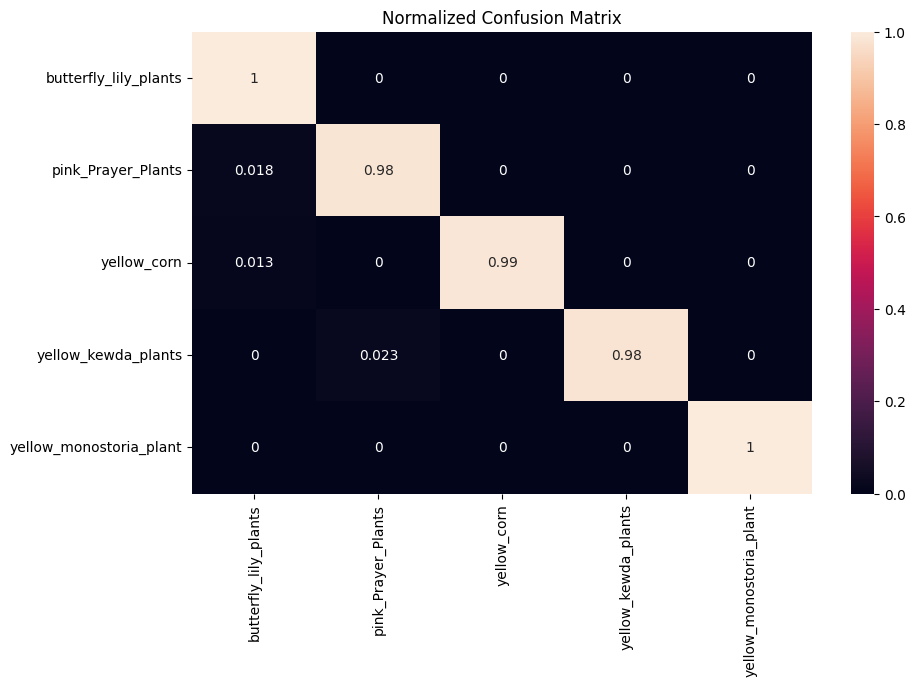

Performance: 

Rec=    98.92124735729388
Spe=    99.99600461984184
Pre=    98.94186245529211
FPR=    0.003995380158170839
FNR=    1.0787526427061311
NPV=    99.99600478576032
FDR=    1.0581375447078933




In [ ]:
print('\n')


val_acc = history_02.history['val_accuracy']
train_acc = history_02.history['accuracy']

results = model_02.evaluate(test_images, verbose=0)
res=results[1]
test_acc = [round(res,4)]
#ploting training acc loss
print("Train Accuracy and Loss Plot: \n")
pd.DataFrame(history_02.history)[['accuracy','val_accuracy']].plot()
plt.title("Training Accuracy")
plt.show()
pd.DataFrame(history_02.history)[['loss','val_loss']].plot()
plt.title("Training  Loss")
plt.show()
print("\n\nAccuracy on the test set: {:.2f}%".format(results[1] * 100))

from sklearn.metrics import confusion_matrix
import seaborn as sns
pred = model_02.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]
y_test = list(test_df.Label)

print('Accuracy:', np.round(metrics.accuracy_score(y_test, pred),5))
print('Precision:', np.round(metrics.precision_score(y_test, pred, average='weighted'),5))
print('Recall:', np.round(metrics.recall_score(y_test,pred, average='weighted'),5))
print('F1 Score:', np.round(metrics.f1_score(y_test, pred, average='weighted'),5))
print(classification_report(y_test, pred))

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from numpy import mean
print("Confusion Matrix of CNN: \n\n")
cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (10,6))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
plt.title('Normalized Confusion Matrix')
plt.show()
confusion_matrix=cf_matrix
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = len(y_test) - (FP + FN + TP)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
print("Performance: \n")
print("Rec=   ",mean(TPR)*100)
print("Spe=   ",mean(TNR)*100)
print("Pre=   ",mean(PPV)*100)
print("FPR=   ",mean(FPR)*100)
print("FNR=   ",mean(FNR)*100)
print("NPV=   ",mean(NPV)*100)
print("FDR=   ",mean(FDR)*100)
print("\n")

9/9 [==============================] - 25s 3s/step


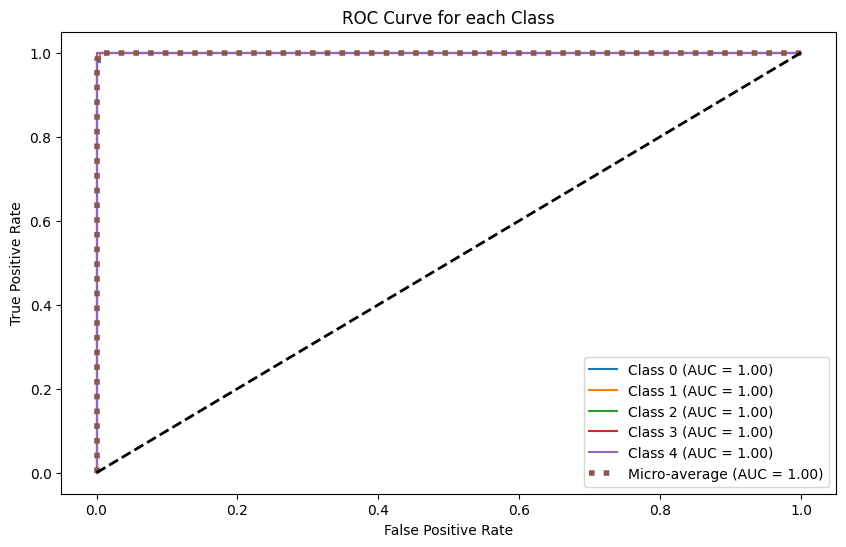

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert labels to binary matrix
y_test_bin = label_binarize(y_test, classes=sorted(set(y_test)))

# Predict probabilities for each class
y_score = model_02.predict(test_images)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})',
         linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each Class')
plt.legend(loc='lower right')
plt.show()


# Transfer Learning Models

In [ ]:
def get_model(model):
# Load the pretained model
    kwargs =    {'input_shape':(224, 224, 3),
                'include_top':False,
                'weights':'imagenet',
                'pooling':'avg'}

    pretrained_model = model(**kwargs)
    pretrained_model.trainable = False

    inputs = pretrained_model.input

    x = tf.keras.layers.Dense(256, activation='relu')(pretrained_model.output)
    x = tf.keras.layers.Dense(256, activation='relu')(x)

    outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [ ]:
# Separate in train and test data
train_df, test_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

Found 1083 validated image filenames belonging to 5 classes.
Found 1083 validated image filenames belonging to 5 classes.
Found 271 validated image filenames belonging to 5 classes.






DenseNet201 Model Training Started ===>>>
Epoch 1/10
34/34 [==============================] - 469s 14s/step - loss: 0.3568 - accuracy: 0.8892 - val_loss: 0.0140 - val_accuracy: 0.9972
Epoch 2/10
34/34 [==============================] - 203s 6s/step - loss: 0.0209 - accuracy: 0.9963 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 3/10
34/34 [==============================] - 213s 6s/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/10
34/34 [==============================] - 205s 6s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 9.4035e-04 - val_accuracy: 1.0000
Epoch 5/10
34/34 [==============================] - 237s 7s/step - loss: 7.0442e-04 - accuracy: 1.0000 - val_loss: 6.7486e-04 - val_accuracy: 1.0000
Epoch 6/10
34/34 [==============================] - 

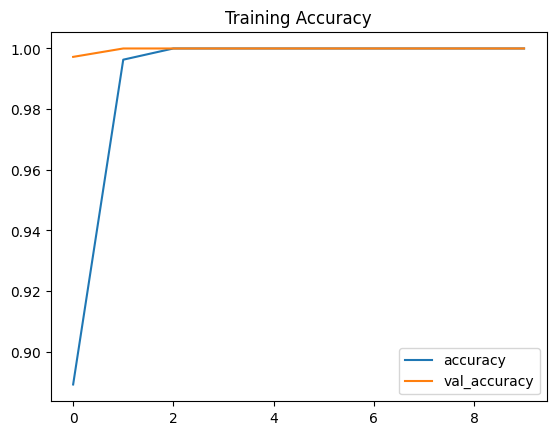

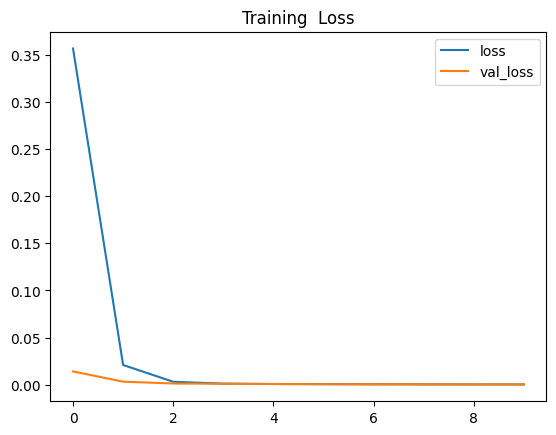



Accuracy on the test set: 100.00%
9/9 [==============================] - 28s 3s/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
                         precision    recall  f1-score   support

  butterfly_lily_plants       1.00      1.00      1.00        50
     pink_Prayer_Plants       1.00      1.00      1.00        50
            yellow_corn       1.00      1.00      1.00        70
    yellow_kewda_plants       1.00      1.00      1.00        56
yellow_monostoria_plant       1.00      1.00      1.00        45

               accuracy                           1.00       271
              macro avg       1.00      1.00      1.00       271
           weighted avg       1.00      1.00      1.00       271

DenseNet201 Confusion Matrix: 




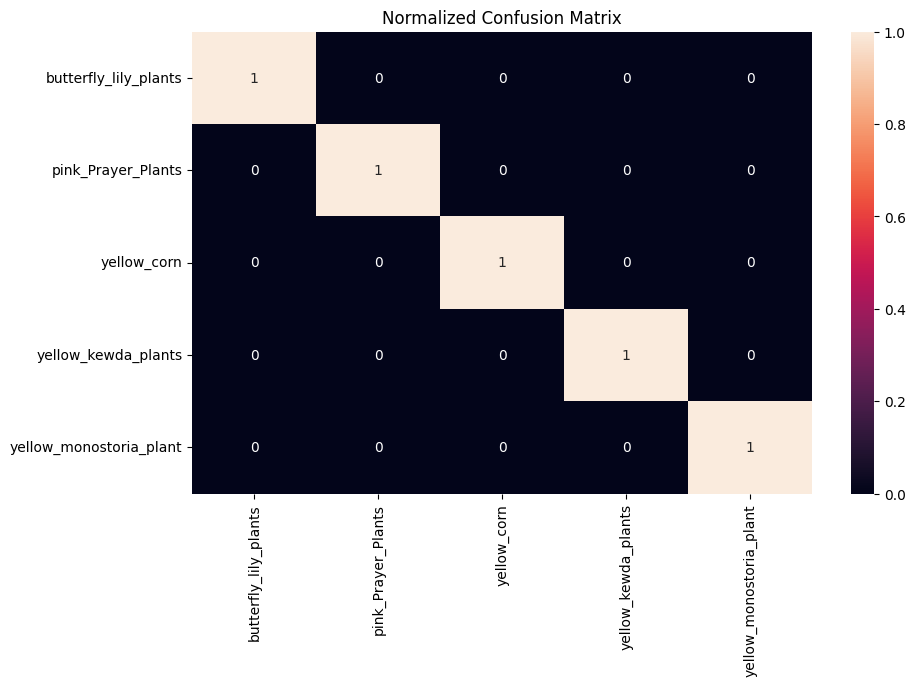

Performance: 

Rec=    100.0
Spe=    100.0
Pre=    100.0
FPR=    0.0
FNR=    0.0
NPV=    100.0
FDR=    0.0




219055592/219055592 [==============================] - 2s 0us/step
InceptionResNetV2 Model Training Started ===>>>
Epoch 1/10
34/34 [==============================] - 227s 6s/step - loss: 0.3842 - accuracy: 0.8633 - val_loss: 0.1102 - val_accuracy: 0.9594
Epoch 2/10
34/34 [==============================] - 204s 6s/step - loss: 0.0845 - accuracy: 0.9760 - val_loss: 0.0969 - val_accuracy: 0.9649
Epoch 3/10
34/34 [==============================] - 205s 6s/step - loss: 0.0529 - accuracy: 0.9797 - val_loss: 0.0466 - val_accuracy: 0.9880
Epoch 4/10
34/34 [==============================] - 203s 6s/step - loss: 0.0496 - accuracy: 0.9806 - val_loss: 0.0373 - val_accuracy: 0.9889
Epoch 5/10
34/34 [==============================] - 200s 6s/step - loss: 0.0287 - accuracy: 0.9898 - val_loss: 0.0120 - val_accuracy: 0.9991
Epoch 6/10
34/34 [==============================] - 207s 6s/step - lo

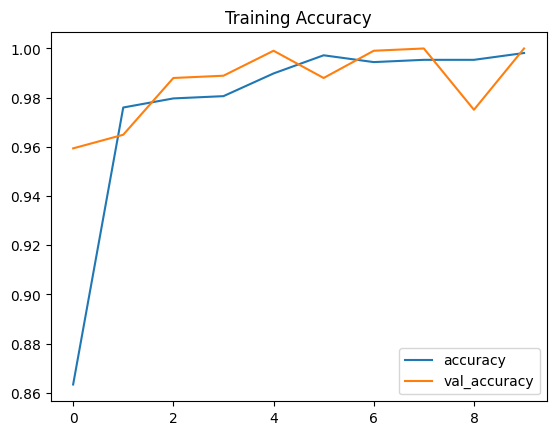

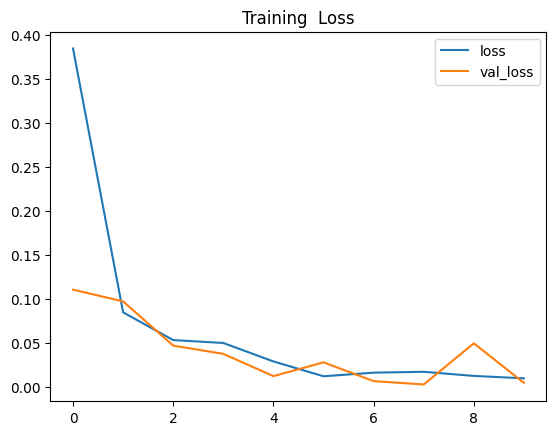



Accuracy on the test set: 98.15%
9/9 [==============================] - 32s 3s/step
Accuracy: 0.98155
Precision: 0.98264
Recall: 0.98155
F1 Score: 0.9817
                         precision    recall  f1-score   support

  butterfly_lily_plants       0.98      0.98      0.98        50
     pink_Prayer_Plants       0.93      1.00      0.96        50
            yellow_corn       1.00      0.97      0.99        70
    yellow_kewda_plants       1.00      1.00      1.00        56
yellow_monostoria_plant       1.00      0.96      0.98        45

               accuracy                           0.98       271
              macro avg       0.98      0.98      0.98       271
           weighted avg       0.98      0.98      0.98       271

InceptionResNetV2 Confusion Matrix: 




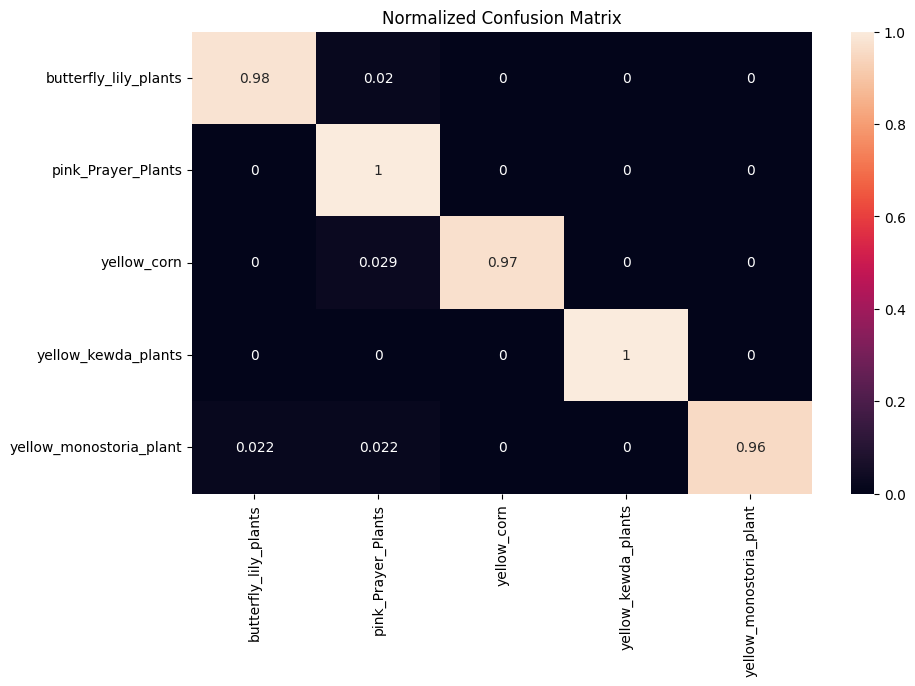

Performance: 

Rec=    98.13968253968254
Spe=    99.99310993533216
Pre=    98.2342759740025
FPR=    0.006890064667842427
FNR=    1.8603174603174601
NPV=    99.99311068890661
FDR=    1.7657240259974987




80134624/80134624 [==============================] - 0s 0us/step
VGG19 Model Training Started ===>>>
Epoch 1/10
34/34 [==============================] - 222s 6s/step - loss: 1.0652 - accuracy: 0.6473 - val_loss: 0.5163 - val_accuracy: 0.8920
Epoch 2/10
34/34 [==============================] - 215s 6s/step - loss: 0.2898 - accuracy: 0.9501 - val_loss: 0.1541 - val_accuracy: 0.9658
Epoch 3/10
34/34 [==============================] - 255s 8s/step - loss: 0.1264 - accuracy: 0.9705 - val_loss: 0.0871 - val_accuracy: 0.9834
Epoch 4/10
34/34 [==============================] - 203s 6s/step - loss: 0.0882 - accuracy: 0.9797 - val_loss: 0.0697 - val_accuracy: 0.9834
Epoch 5/10
34/34 [==============================] - 213s 6s/step - loss: 0.0590 - accuracy: 0.9908 - val_loss: 0.0417 - val_accura

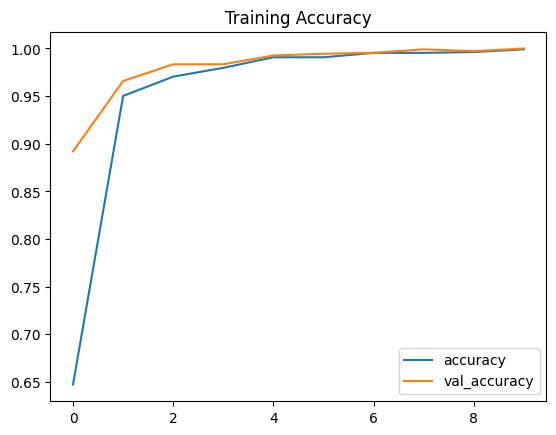

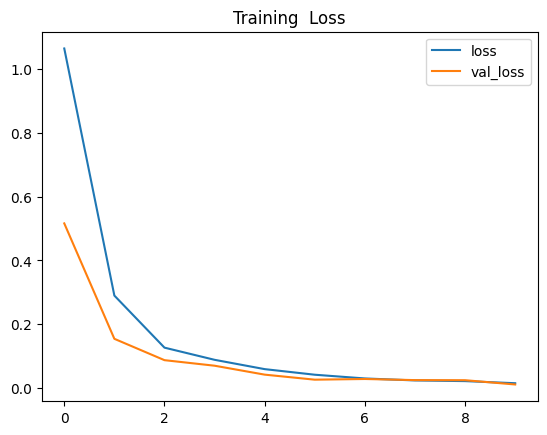



Accuracy on the test set: 100.00%
9/9 [==============================] - 27s 3s/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
                         precision    recall  f1-score   support

  butterfly_lily_plants       1.00      1.00      1.00        50
     pink_Prayer_Plants       1.00      1.00      1.00        50
            yellow_corn       1.00      1.00      1.00        70
    yellow_kewda_plants       1.00      1.00      1.00        56
yellow_monostoria_plant       1.00      1.00      1.00        45

               accuracy                           1.00       271
              macro avg       1.00      1.00      1.00       271
           weighted avg       1.00      1.00      1.00       271

VGG19 Confusion Matrix: 




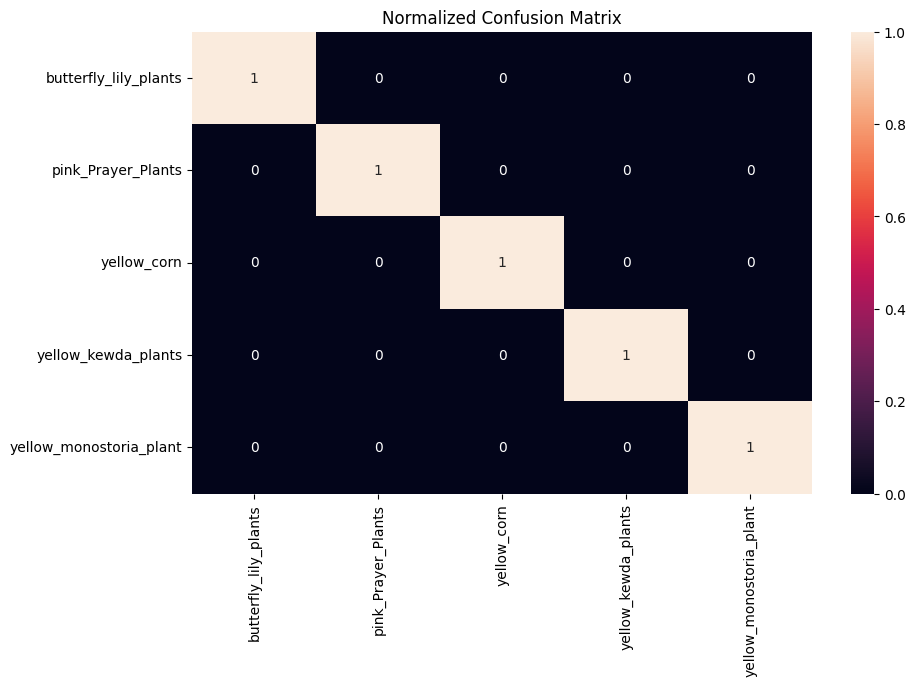

Performance: 

Rec=    100.0
Spe=    100.0
Pre=    100.0
FPR=    0.0
FNR=    0.0
NPV=    100.0
FDR=    0.0




In [ ]:

# Dictionary with the models

models = {
    "DenseNet201": {"model":tf.keras.applications.DenseNet201, "perf":0},
    "InceptionResNetV2": {"model":tf.keras.applications.InceptionResNetV2, "perf":0},
    "VGG19": {"model":tf.keras.applications.VGG19, "perf":0},
}

# Create the generators
train_generator,test_generator,train_images,val_images,test_images=create_gen()
print('\n')
print('\n')

# Fit the models
for name, model in models.items():
    print('\n')

    # Get the model
    m = get_model(model['model'])
    models[name]['model'] = m


    print(f"{name:2} Model Training Started ===>>>")


    start = perf_counter()

    # Fit the model
    history = m.fit(train_images,validation_data=val_images,epochs=10,verbose=1)

    # Sav the duration, the train_accuracy and the val_accuracy
    duration = perf_counter() - start
    duration = round(duration,2)
    models[name]['perf'] = duration
    print(f"{name:2} trained in {duration} sec")

    val_acc = history.history['val_accuracy']
    models[name]['val_acc'] = [round(v,4) for v in val_acc]

    train_acc = history.history['accuracy']
    models[name]['train_accuracy'] = [round(v,4) for v in train_acc]

    results = m.evaluate(test_images, verbose=0)
    res=results[1]
    models[name]['test_accuracy'] = [round(res,4)]

    #ploting training acc loss
    print(f"{name:2} Train Accuracy and Loss Plot: \n")

    pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
    plt.title("Training Accuracy")
    plt.show()
    pd.DataFrame(history.history)[['loss','val_loss']].plot()
    plt.title("Training  Loss")
    plt.show()

    print("\n\nAccuracy on the test set: {:.2f}%".format(results[1] * 100))


    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    pred = m.predict(test_images)
    pred = np.argmax(pred,axis=1)

    # Map the label
    labels = (train_images.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]
    y_test = list(test_df.Label)

    print('Accuracy:', np.round(metrics.accuracy_score(y_test, pred),5))
    print('Precision:', np.round(metrics.precision_score(y_test, pred, average='weighted'),5))
    print('Recall:', np.round(metrics.recall_score(y_test,pred, average='weighted'),5))
    print('F1 Score:', np.round(metrics.f1_score(y_test, pred, average='weighted'),5))
    print(classification_report(y_test, pred))


    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    import math
    from numpy import mean


    print(f"{name:2} Confusion Matrix: \n\n")
    cf_matrix = confusion_matrix(y_test, pred, normalize='true')
    plt.figure(figsize = (10,6))
    sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
    plt.title('Normalized Confusion Matrix')
    plt.show()

    confusion_matrix=cf_matrix

    FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
    FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
    TP = np.diag(confusion_matrix)
    TN = len(y_test) - (FP + FN + TP)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP)
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    print("Performance: \n")
    print("Rec=   ",mean(TPR)*100)
    print("Spe=   ",mean(TNR)*100)
    print("Pre=   ",mean(PPV)*100)
    print("FPR=   ",mean(FPR)*100)
    print("FNR=   ",mean(FNR)*100)
    print("NPV=   ",mean(NPV)*100)
    print("FDR=   ",mean(FDR)*100)
    print("\n")

In [ ]:
models = {
    "MobileNetV2": {"model":tf.keras.applications.MobileNetV2, "perf":0},
    "ResNet101": {"model":tf.keras.applications.ResNet50, "perf":0}
}

# Create the generators
train_generator,test_generator,train_images,val_images,test_images=create_gen()
print('\n')
print('\n')

# Fit the models
for name, model in models.items():
    print('\n')

    # Get the model
    m = get_model(model['model'])
    models[name]['model'] = m


    print(f"{name:2} Model Training Started ===>>>")


    start = perf_counter()

    # Fit the model
    history = m.fit(train_images,validation_data=val_images,epochs=30,verbose=1)

    # Sav the duration, the train_accuracy and the val_accuracy
    duration = perf_counter() - start
    duration = round(duration,2)
    models[name]['perf'] = duration
    print(f"{name:2} trained in {duration} sec")

    val_acc = history.history['val_accuracy']
    models[name]['val_acc'] = [round(v,4) for v in val_acc]

    train_acc = history.history['accuracy']
    models[name]['train_accuracy'] = [round(v,4) for v in train_acc]

    results = m.evaluate(test_images, verbose=0)
    res=results[1]
    models[name]['test_accuracy'] = [round(res,4)]

    #ploting training acc loss
    print(f"{name:2} Train Accuracy and Loss Plot: \n")

    pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
    plt.title("Training Accuracy")
    plt.show()
    pd.DataFrame(history.history)[['loss','val_loss']].plot()
    plt.title("Training  Loss")
    plt.show()

    print("\n\nAccuracy on the test set: {:.2f}%".format(results[1] * 100))


    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    pred = m.predict(test_images)
    pred = np.argmax(pred,axis=1)

    # Map the label
    labels = (train_images.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]
    y_test = list(test_df.Label)

    print('Accuracy:', np.round(metrics.accuracy_score(y_test, pred),5))
    print('Precision:', np.round(metrics.precision_score(y_test, pred, average='weighted'),5))
    print('Recall:', np.round(metrics.recall_score(y_test,pred, average='weighted'),5))
    print('F1 Score:', np.round(metrics.f1_score(y_test, pred, average='weighted'),5))
    print(classification_report(y_test, pred))


    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    import math
    from numpy import mean


    print(f"{name:2} Confusion Matrix: \n\n")
    cf_matrix = confusion_matrix(y_test, pred, normalize='true')
    plt.figure(figsize = (10,6))
    sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
    plt.title('Normalized Confusion Matrix')
    plt.show()

    confusion_matrix=cf_matrix

    FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
    FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
    TP = np.diag(confusion_matrix)
    TN = len(y_test) - (FP + FN + TP)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP)
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    print("Performance: \n")
    print("Rec=   ",mean(TPR)*100)
    print("Spe=   ",mean(TNR)*100)
    print("Pre=   ",mean(PPV)*100)
    print("FPR=   ",mean(FPR)*100)
    print("FNR=   ",mean(FNR)*100)
    print("NPV=   ",mean(NPV)*100)
    print("FDR=   ",mean(FDR)*100)
    print("\n")

Found 1083 validated image filenames belonging to 5 classes.
Found 1083 validated image filenames belonging to 5 classes.
Found 271 validated image filenames belonging to 5 classes.






9406464/9406464 [==============================] - 0s 0us/step
MobileNetV2 Model Training Started ===>>>
Epoch 1/30
 1/34 [..............................] - ETA: 4:46 - loss: 1.8111 - accuracy: 0.0938

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(data=
{'Deep Learning Model':['DenseNet201', 'InceptionResNetV2', 'VGG19', 'MobileNetV2', 'ResNet101' , 'CNN01', 'CNN02'],
'Accuracy':[]})

plt.figure(figsize=(8,6))

p = sns.barplot(x='Deep Learning Model', y='Accuracy',data=df)
for i in p.containers:
    labels = [f'{v.get_height():0.02f}%' for v in i]
    p.bar_label(i, labels=labels)

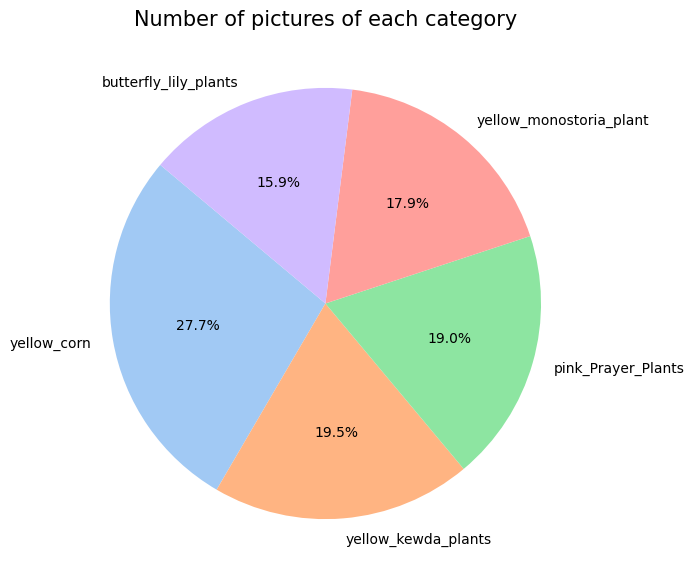

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming image_df is your dataframe containing the image data with 'Label' column
image_df = pd.DataFrame({
    'Label': ['yellow_corn'] * 375 +
             ['yellow_kewda_plants'] * 264 +
             ['pink_Prayer_Plants'] * 257 +
             ['yellow_monostoria_plant'] * 243 +
             ['butterfly_lily_plants'] * 215
})

# Count the number of pictures in each category
vc = image_df['Label'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 7))
colors = sns.color_palette('pastel')[0:5]  # Choose a pastel color palette
plt.pie(vc, labels=vc.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Number of pictures of each category", fontsize=15)
plt.show()
